In [1]:
import numpy as np
import pandas as pd

from sklearn import (
    model_selection, tree, metrics, svm, decomposition
)

# loading data

In [2]:
df = 'AimoScore_WeakLink_big_scores (1).xls'
df = pd.read_excel(df, index_col= 'ID').drop(['AimoScore','EstimatedScore'], axis= 1)
df

,No_1_Angle_Deviation,No_2_Angle_Deviation,No_3_Angle_Deviation,No_4_Angle_Deviation,No_5_Angle_Deviation,No_6_Angle_Deviation,No_7_Angle_Deviation,No_8_Angle_Deviation,No_9_Angle_Deviation,No_10_Angle_Deviation,...,No_18_NASM_Deviation,No_19_NASM_Deviation,No_20_NASM_Deviation,No_21_NASM_Deviation,No_22_NASM_Deviation,No_23_NASM_Deviation,No_24_NASM_Deviation,No_25_NASM_Deviation,No_1_Time_Deviation,No_2_Time_Deviation
ID,,,,,,,,,,,,,,,,,,,,,
0003cdcc-86ed-494a-a3b5-90d09e96e06b.Kinect,0.538020,0.815878,0.346724,0.382114,0.302248,0.947872,0.275945,0.521760,0.457198,0.210426,...,0.587757,0.833094,0.656624,0.642276,0.552846,0.648972,0.578192,0.560019,0.821616,0.818747
003115c4-bdb8-491c-b571-8fcebdecf8ed.Kinect,0.443807,0.306552,0.823529,0.188905,0.497370,0.140124,0.664275,0.521760,0.729316,0.912482,...,0.441416,0.670971,0.721186,0.826399,0.805356,0.848876,0.889048,0.816834,0.307987,0.248207
00316bfb-ed43-489f-a55b-11c7f01c852d.Kinect,0.603539,0.373984,0.346724,0.590626,0.341942,0.298900,0.276901,0.623625,0.658058,0.244381,...,0.733142,0.670971,0.656624,0.642276,0.690579,0.648972,0.578192,0.555715,0.218556,0.235294
00607608-6f2f-459b-a69d-e14067489459.Kinect,0.484935,0.623625,0.380201,0.975132,0.509326,0.888570,0.363462,0.847441,0.237207,0.723577,...,0.934003,0.953611,0.656624,0.642276,0.552846,0.648972,0.578192,0.744620,0.458154,0.432807
007396ec-3463-4a05-915c-02244ff8d3de.Kinect,0.860832,0.657580,0.745576,0.552846,0.375897,0.483022,0.388331,0.521760,0.387853,0.210426,...,0.441416,0.670971,0.656624,0.642276,0.552846,0.648972,0.578192,0.308943,0.805356,0.774271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff514cba-6c5e-41a9-9936-3e8400565c8d.Kinect,0.279770,0.131038,0.346724,0.317073,0.945481,0.646581,0.913439,0.521760,0.570540,0.962697,...,0.789574,0.670971,0.945002,0.642276,0.596365,0.648972,0.749880,0.943568,0.684840,0.711621
ff63b8a9-deb5-4179-b424-fd07d04ca37f.Kinect,0.564802,0.311813,0.376375,0.188905,0.187948,0.347202,0.227642,0.521760,0.248685,0.871353,...,0.478718,0.670971,0.753228,0.642276,0.552846,0.648972,0.869440,0.316117,0.148733,0.151124
ff015ddd-c9fb-49e3-8e33-abbf72e8b120.Kinect,0.404489,0.214422,0.822827,0.937440,0.739255,0.909265,0.681471,0.658071,0.822350,0.614136,...,0.970392,0.973257,0.886819,0.640401,0.525310,0.776982,0.822827,0.367717,0.584050,0.570201


# finding optimal number of clusters

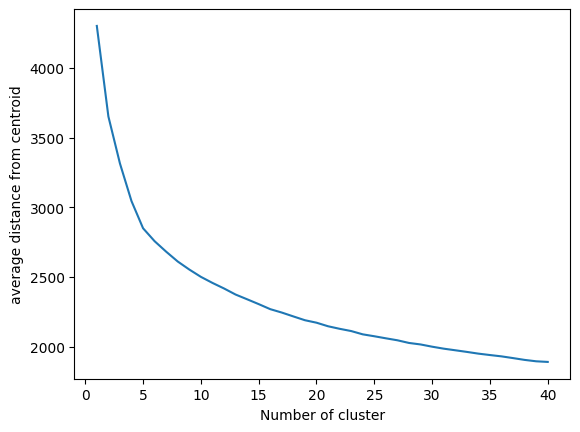

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks  = list(range(1,41))
sse = []
for k in ks:
    kmeans = KMeans(n_clusters= k, max_iter= 1000, n_init= 100).fit(df)
    sse.append(kmeans.inertia_)

plt.plot(ks, sse, '-')
plt.xlabel("Number of cluster")
plt.ylabel("average distance from centroid")
plt.show()

# champion cluster model

In [4]:
model = KMeans(n_clusters= 5, max_iter= 1000, n_init= 'auto').fit(df)

# pca decomposition

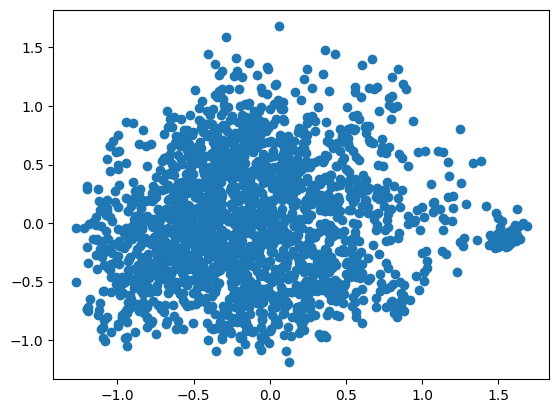

In [5]:
components = decomposition.PCA(n_components= 2).fit_transform(df)
plt.plot(components[:,0], components[:,1], 'o')